In [39]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import tensorflow as tf

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.svm import SVR

import mitosheet

In [41]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

### Unstructured Variance, n_input = 12, n_output = 1

In [42]:
df = pd.read_excel("Data/US12I1O.xlsx", index_col = 0)
df

,Input 01,Input 02,Input 03,Input 04,Input 05,Input 06,Input 07,Input 08,Input 09,Input 10,Input 11,Input 12,Output 01
DMU 0001,288.81,493.46,202.31,356.18,384.45,653.77,129.40,100.28,38.45,306.59,92.41,250.91,250.77
DMU 0002,349.98,420.00,139.32,312.89,543.04,504.54,120.43,177.65,86.96,330.87,79.16,201.81,372.71
DMU 0003,280.78,452.42,127.85,315.42,559.22,466.35,166.57,165.57,81.43,359.75,83.23,246.78,293.40
DMU 0004,405.33,376.32,237.28,451.43,414.19,318.03,187.77,154.65,49.71,316.82,97.74,344.70,462.69
DMU 0005,348.96,426.79,170.01,292.91,502.76,342.94,146.53,165.78,63.80,329.79,76.17,355.61,374.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,206.54,333.40,274.01,424.09,465.99,548.04,143.02,58.25,49.65,355.16,85.54,238.49,279.23
DMU 0997,328.82,415.09,121.60,268.46,494.32,454.22,150.96,143.44,65.04,374.88,69.81,261.57,344.45
DMU 0998,310.52,565.44,126.06,320.91,463.01,390.07,151.81,202.55,101.67,333.12,87.52,328.13,320.62
DMU 0999,390.34,255.88,209.15,269.76,576.57,261.14,162.39,102.92,66.70,401.16,72.50,318.26,380.24


In [43]:
df_sol = pd.read_excel("US12I1O_Solution.xlsx", index_col = 0)
df_sol

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.501907,0.000000,0.0,0.001253,0.0,0.000368,0.000000,0.000000,0.002144,0.007462,0.0,0.000000,0.000411,0.002001
DMU 0002,0.791705,0.000000,0.0,0.002071,0.0,0.000000,0.000000,0.003432,0.000000,0.000000,0.0,0.000000,0.001477,0.002124
DMU 0003,0.565044,0.000250,0.0,0.002169,0.0,0.000000,0.000309,0.000000,0.000000,0.000000,0.0,0.000000,0.002061,0.001926
DMU 0004,0.860990,0.000000,0.0,0.000000,0.0,0.000688,0.000904,0.000000,0.000000,0.008602,0.0,0.000000,0.000000,0.001861
DMU 0005,0.701855,0.000000,0.0,0.001487,0.0,0.000000,0.000096,0.000000,0.000000,0.000000,0.0,0.009375,0.000000,0.001876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.670301,0.002101,0.0,0.000752,0.0,0.000058,0.000000,0.000000,0.004488,0.001436,0.0,0.000000,0.000000,0.002401
DMU 0997,0.741442,0.000000,0.0,0.001710,0.0,0.000000,0.000000,0.000000,0.000324,0.000088,0.0,0.010350,0.000066,0.002153
DMU 0998,0.622777,0.000088,0.0,0.002191,0.0,0.000869,0.000754,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.001942
DMU 0999,0.748878,0.000000,0.0,0.000000,0.0,0.000000,0.000666,0.000000,0.002744,0.000000,0.0,0.007498,0.000000,0.001969


In [44]:
mitosheet.sheet(df_sol, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-de196947-54aa-4b2a-9757-5965b1cd2fd1", "code": {"imports…

In [45]:
print((df_sol==0).sum())
print("Total : ", (df_sol==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01      330
Weight_Input 02      801
Weight_Input 03      249
Weight_Input 04      717
Weight_Input 05      681
Weight_Input 06      396
Weight_Input 07      673
Weight_Input 08      428
Weight_Input 09      599
Weight_Input 10      830
Weight_Input 11      742
Weight_Input 12      757
Weight_Output 01       0
dtype: int64
Total :  7203


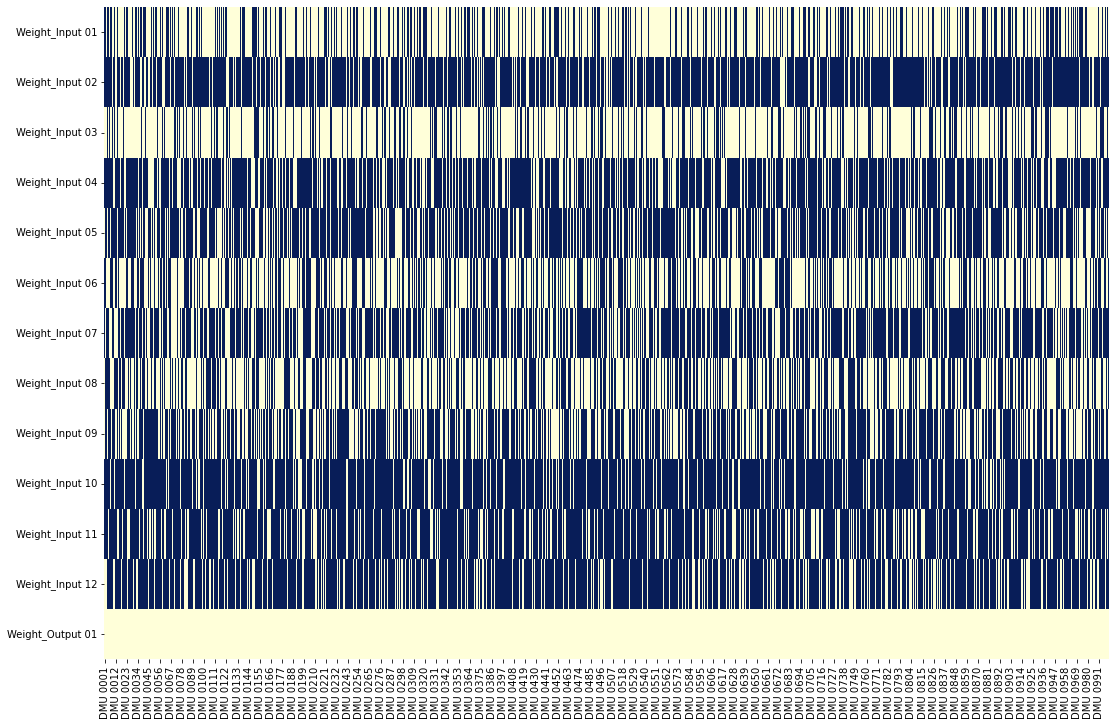

In [46]:
plt.figure(figsize=(18,12))
sns.heatmap(df_sol.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

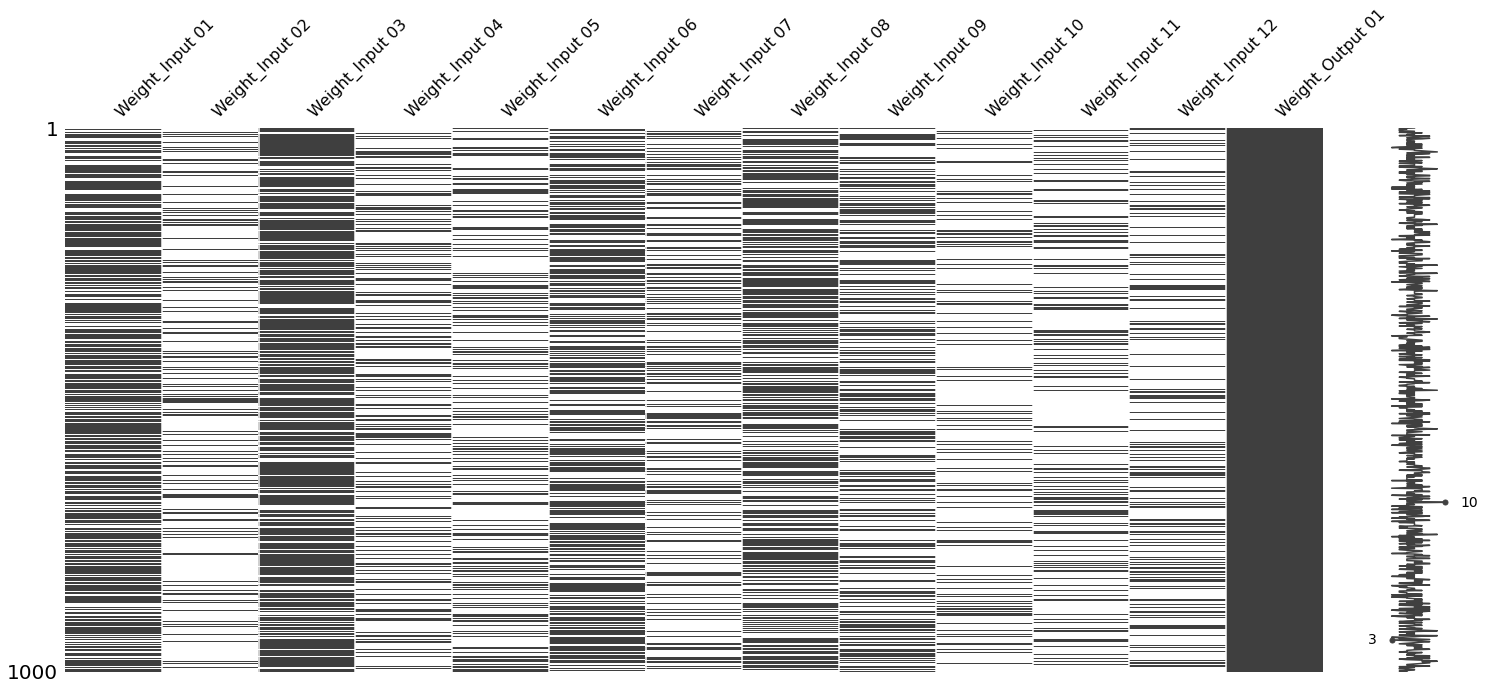

In [47]:
msno.matrix(df_sol.iloc[:,1:].replace(0, np.nan));

In [48]:
df_sol.iloc[:,1:].replace(0, np.nan).isna().sum(axis=1).describe()

count    1000.00000
mean        7.20300
std         1.28975
min         3.00000
25%         6.00000
50%         7.00000
75%         8.00000
max        10.00000
dtype: float64

### DecisionTreeRegressor

In [49]:
df_dt = pd.read_excel("US12I1O_decisiontreeregressor_Solution.xlsx", index_col=0)
df_dt

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.476013,0.001640,0.000000,0.000793,0.000000,0.000000,0.000000,0.000000,0.003021,0.001640,0.000000,0.000000,0.000000,0.001898
DMU 0002,0.619228,0.000840,0.000000,0.000840,0.000211,0.000000,0.000362,0.000840,0.000840,0.000840,0.000000,0.000211,0.000000,0.001661
DMU 0003,0.522210,0.000999,0.000000,0.000999,0.000161,0.000000,0.000444,0.000444,0.000999,0.000999,0.000000,0.000161,0.000000,0.001780
DMU 0004,0.728848,0.000911,0.000000,0.000829,0.000000,0.000000,0.000489,0.000489,0.000911,0.000911,0.000000,0.000000,0.000000,0.001575
DMU 0005,0.654420,0.000926,0.000000,0.000926,0.000000,0.000000,0.000499,0.000926,0.000926,0.000926,0.000000,0.000000,0.000000,0.001749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.668325,0.002138,0.000000,0.000777,0.000000,0.000000,0.000000,0.000000,0.004620,0.001539,0.000000,0.000000,0.000000,0.002393
DMU 0997,0.628824,0.000952,0.000000,0.000952,0.000341,0.000000,0.000341,0.000494,0.001144,0.000952,0.000000,0.000341,0.000000,0.001826
DMU 0998,0.549079,0.000907,0.000000,0.000907,0.000000,0.000000,0.000489,0.000907,0.000907,0.000907,0.000000,0.000000,0.000000,0.001713
DMU 0999,0.683487,0.000543,0.000356,0.000543,0.000356,0.000000,0.000543,0.000543,0.001901,0.000543,0.000000,0.000356,0.000000,0.001798


In [50]:
print((df_dt==0).sum())
print("Total : ", (df_dt==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        1
Weight_Input 02      662
Weight_Input 03        6
Weight_Input 04      368
Weight_Input 05      772
Weight_Input 06      102
Weight_Input 07       73
Weight_Input 08        0
Weight_Input 09        4
Weight_Input 10      810
Weight_Input 11      494
Weight_Input 12      862
Weight_Output 01       0
dtype: int64
Total :  4154


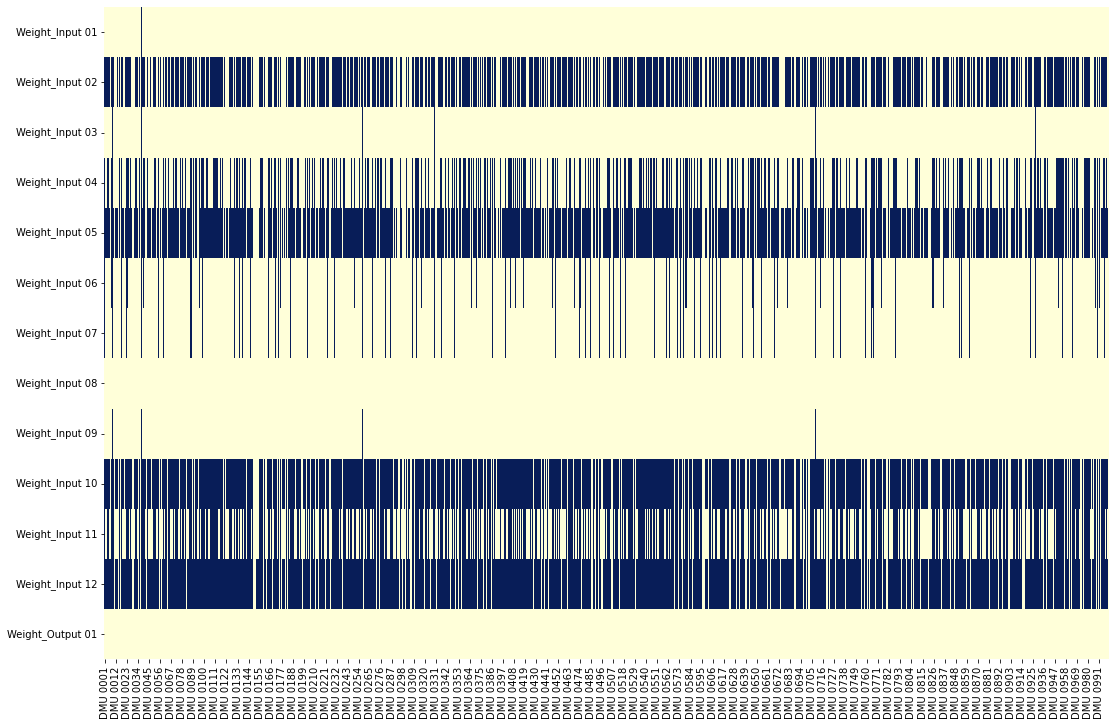

In [51]:
plt.figure(figsize=(18,12))
sns.heatmap(df_dt.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [52]:
res_dt = pd.DataFrame()
res_dt["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_dt["Efficiency_Scores_DT"] = df_dt["Efficiency_Scores"]
res_dt["Diff"] = res_dt["Efficiency_Scores_Basic"]  - res_dt["Efficiency_Scores_DT"]
res_dt["Diff_Perc"] = (res_dt["Diff"] / res_dt["Efficiency_Scores_Basic"]) * 100 
res_dt["Diff_Perc < 10"] = np.abs(res_dt["Diff_Perc"]) < 10  
res_dt = res_dt.round(4)
res_dt


,Efficiency_Scores_Basic,Efficiency_Scores_DT,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.5019,0.4760,0.0259,5.1592,True
DMU 0002,0.7917,0.6192,0.1725,21.7855,False
DMU 0003,0.5650,0.5222,0.0428,7.5806,True
DMU 0004,0.8610,0.7288,0.1321,15.3477,False
DMU 0005,0.7019,0.6544,0.0474,6.7586,True
...,...,...,...,...,...
DMU 0996,0.6703,0.6683,0.0020,0.2948,True
DMU 0997,0.7414,0.6288,0.1126,15.1891,False
DMU 0998,0.6228,0.5491,0.0737,11.8338,False
DMU 0999,0.7489,0.6835,0.0654,8.7318,True


In [53]:
mitosheet.sheet(res_dt, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-cfdda76e-43a2-4657-b889-c7a109acb067", "code": {"imports…

In [54]:
blue = res_dt["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_dt["Diff_Perc < 10"]) - (res_dt["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  639
red :  361


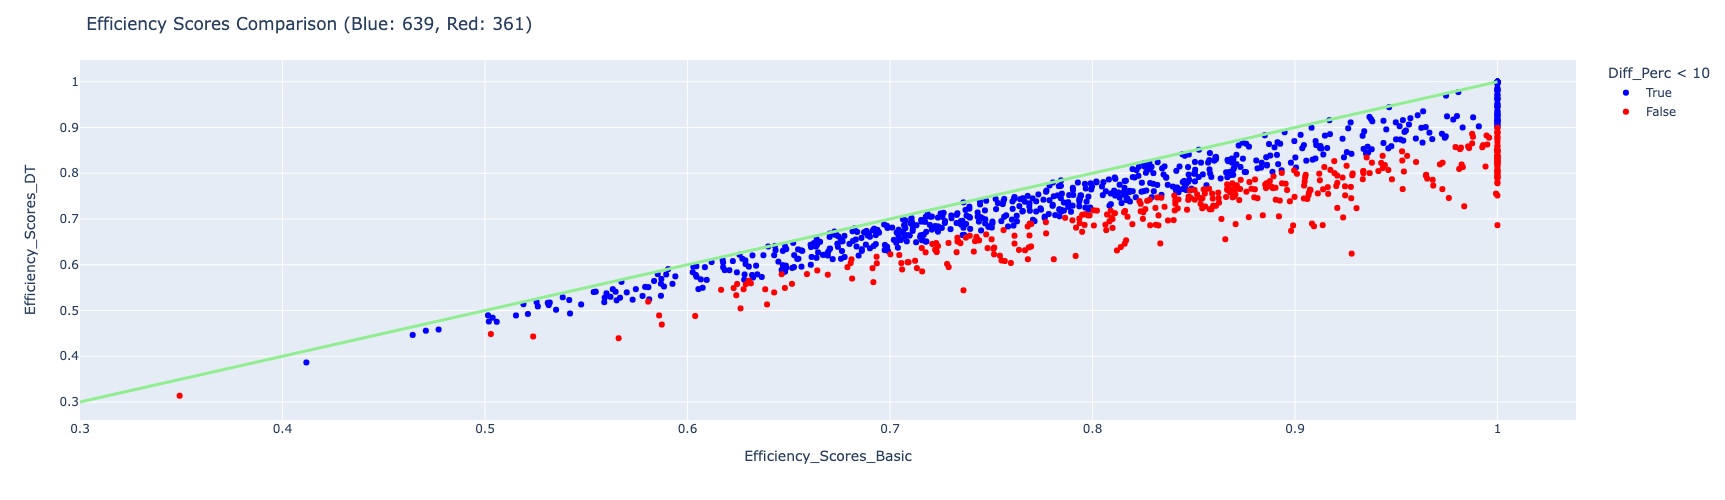

In [55]:
fig = px.scatter(res_dt, x="Efficiency_Scores_Basic", y="Efficiency_Scores_DT", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_DT", "Diff_Perc"] + [res_dt.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### RandomForestRegressor

In [56]:
df_rf = pd.read_excel("US12I1O_randomforestregressor_Solution.xlsx", index_col=0)
df_rf

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.483621,0.001151,0.000000,0.001151,0.000000,0.000000,0.000000,0.000000,0.003189,0.002988,0.000000,0.000000,0.000000,0.001929
DMU 0002,0.608375,0.000900,0.000000,0.000900,0.000166,0.000000,0.000383,0.000383,0.000900,0.000900,0.000000,0.000383,0.000000,0.001632
DMU 0003,0.524193,0.001088,0.000000,0.001088,0.000153,0.000000,0.000430,0.000153,0.001088,0.001088,0.000000,0.000153,0.000000,0.001787
DMU 0004,0.732253,0.000946,0.000003,0.000752,0.000003,0.000003,0.000752,0.000003,0.000946,0.000946,0.000003,0.000003,0.000003,0.001583
DMU 0005,0.653763,0.000971,0.000000,0.000971,0.000000,0.000000,0.000484,0.000484,0.000971,0.000971,0.000000,0.000484,0.000000,0.001747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.663225,0.002352,0.000000,0.000495,0.000000,0.000000,0.000000,0.000000,0.004495,0.002352,0.000000,0.000000,0.000000,0.002375
DMU 0997,0.629062,0.000976,0.000000,0.000976,0.000348,0.000000,0.000348,0.000348,0.001123,0.001089,0.000000,0.000348,0.000000,0.001826
DMU 0998,0.547888,0.000963,0.000000,0.000963,0.000000,0.000000,0.000489,0.000489,0.000963,0.000963,0.000000,0.000251,0.000000,0.001709
DMU 0999,0.685750,0.000710,0.000000,0.000710,0.000104,0.000000,0.000710,0.000710,0.001429,0.000710,0.000000,0.000710,0.000000,0.001803


In [57]:
print((df_rf==0).sum())
print("Total : ", (df_rf==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        1
Weight_Input 02      778
Weight_Input 03        9
Weight_Input 04      450
Weight_Input 05      896
Weight_Input 06       95
Weight_Input 07      253
Weight_Input 08        0
Weight_Input 09        1
Weight_Input 10      629
Weight_Input 11      285
Weight_Input 12      802
Weight_Output 01       0
dtype: int64
Total :  4199


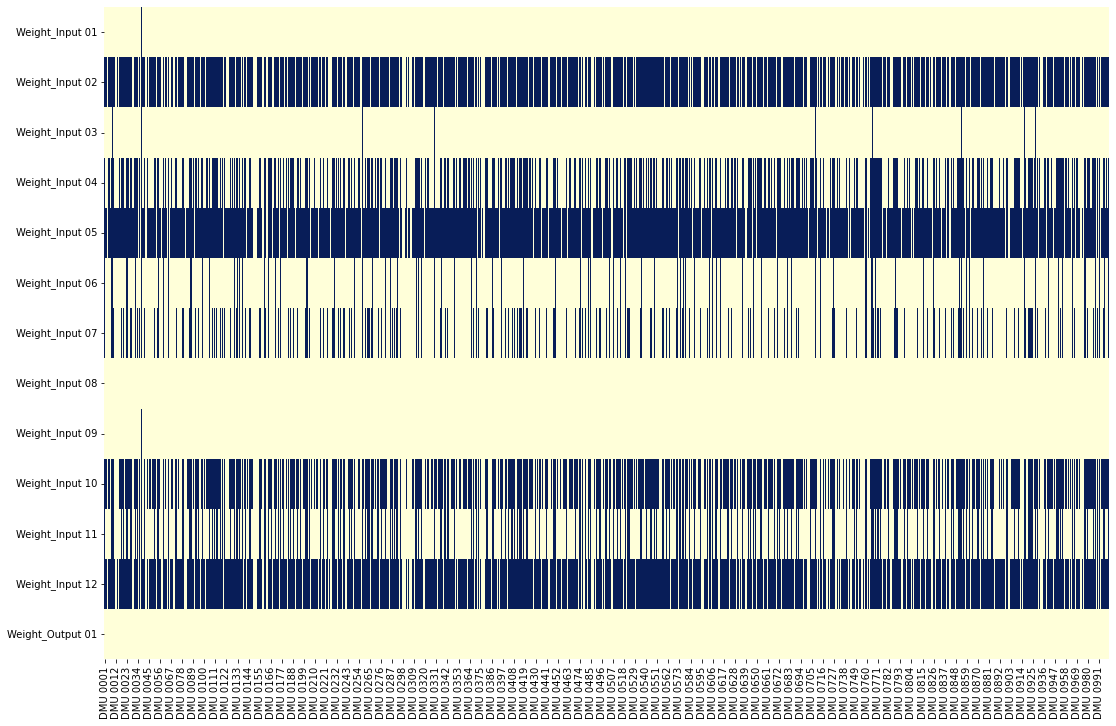

In [58]:
plt.figure(figsize=(18,12))
sns.heatmap(df_rf.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [59]:
res_rf = pd.DataFrame()
res_rf["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_rf["Efficiency_Scores_RF"] = df_rf["Efficiency_Scores"]
res_rf["Diff"] = res_rf["Efficiency_Scores_Basic"]  - res_rf["Efficiency_Scores_RF"]
res_rf["Diff_Perc"] = (res_rf["Diff"] / res_rf["Efficiency_Scores_Basic"]) * 100 
res_rf["Diff_Perc < 10"] = np.abs(res_rf["Diff_Perc"]) < 10  
res_rf = res_rf.round(4)
res_rf


,Efficiency_Scores_Basic,Efficiency_Scores_RF,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.5019,0.4836,0.0183,3.6432,True
DMU 0002,0.7917,0.6084,0.1833,23.1564,False
DMU 0003,0.5650,0.5242,0.0409,7.2297,True
DMU 0004,0.8610,0.7323,0.1287,14.9522,False
DMU 0005,0.7019,0.6538,0.0481,6.8521,True
...,...,...,...,...,...
DMU 0996,0.6703,0.6632,0.0071,1.0557,True
DMU 0997,0.7414,0.6291,0.1124,15.1571,False
DMU 0998,0.6228,0.5479,0.0749,12.0249,False
DMU 0999,0.7489,0.6858,0.0631,8.4296,True


In [60]:
mitosheet.sheet(res_rf, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-b84b86db-8b69-43c1-800b-8db521cbc61d", "code": {"imports…

In [61]:
blue = res_rf["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_rf["Diff_Perc < 10"]) - (res_rf["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  626
red :  374


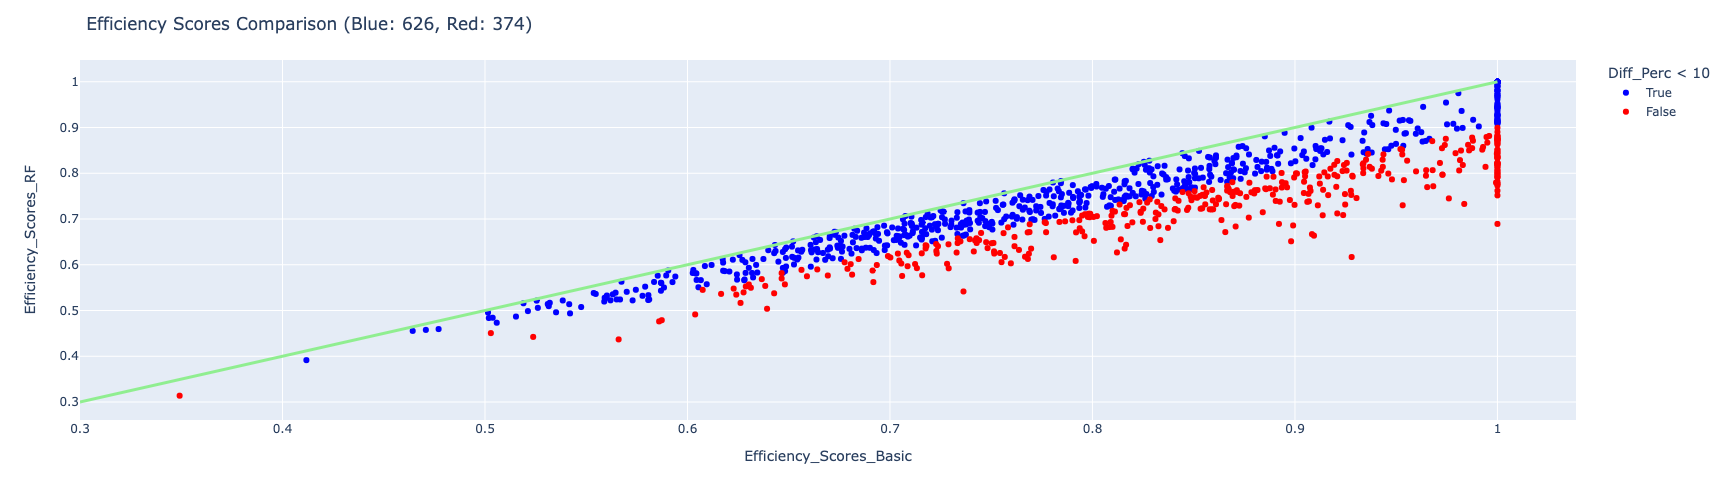

In [62]:
fig = px.scatter(res_rf, x="Efficiency_Scores_Basic", y="Efficiency_Scores_RF", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_RF", "Diff_Perc"] + [res_rf.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### GradientBoostingRegressor

In [63]:
df_gb = pd.read_excel("US12I1O_gradientboostingregressor_Solution.xlsx", index_col=0)
df_gb

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.452396,0.001918,0.000000e+00,0.001054,0.000000e+00,0.000000,0.000000,0.000000e+00,0.001918,0.001054,0.000000,0.000000e+00,0.000000e+00,0.001804
DMU 0002,0.614890,0.000893,2.083228e-04,0.000893,2.083228e-04,0.000083,0.000208,2.083228e-04,0.000893,0.000208,0.000000,2.083228e-04,2.083228e-04,0.001650
DMU 0003,0.531879,0.001424,0.000000e+00,0.000860,0.000000e+00,0.000000,0.000584,0.000000e+00,0.001029,0.000584,0.000000,0.000000e+00,0.000000e+00,0.001813
DMU 0004,0.736800,0.001250,0.000000e+00,0.000714,0.000000e+00,0.000000,0.000559,0.000000e+00,0.000714,0.000714,0.000000,0.000000e+00,0.000000e+00,0.001592
DMU 0005,0.655633,0.001225,0.000000e+00,0.000757,0.000000e+00,0.000000,0.000570,5.701252e-04,0.000757,0.000614,0.000000,0.000000e+00,0.000000e+00,0.001752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.602185,0.002022,1.210457e-04,0.000598,1.210457e-04,0.000121,0.000121,1.210457e-04,0.002022,0.000598,0.000000,1.210457e-04,1.210457e-04,0.002157
DMU 0997,0.625057,0.000963,4.821360e-05,0.000963,3.277403e-04,0.000048,0.000328,3.277403e-04,0.000963,0.000963,0.000000,3.277403e-04,4.821360e-05,0.001815
DMU 0998,0.561999,0.001223,0.000000e+00,0.000760,0.000000e+00,0.000000,0.000576,5.757285e-04,0.000760,0.000576,0.000000,0.000000e+00,0.000000e+00,0.001753
DMU 0999,0.678913,0.000970,7.311812e-07,0.000970,7.311812e-07,0.000000,0.000970,7.311812e-07,0.000970,0.000970,0.000000,7.311812e-07,7.311812e-07,0.001785


In [64]:
print((df_gb==0).sum())
print("Total : ", (df_gb==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      532
Weight_Input 03        1
Weight_Input 04      319
Weight_Input 05      757
Weight_Input 06       42
Weight_Input 07      200
Weight_Input 08        1
Weight_Input 09       12
Weight_Input 10      865
Weight_Input 11      401
Weight_Input 12      635
Weight_Output 01       0
dtype: int64
Total :  3765


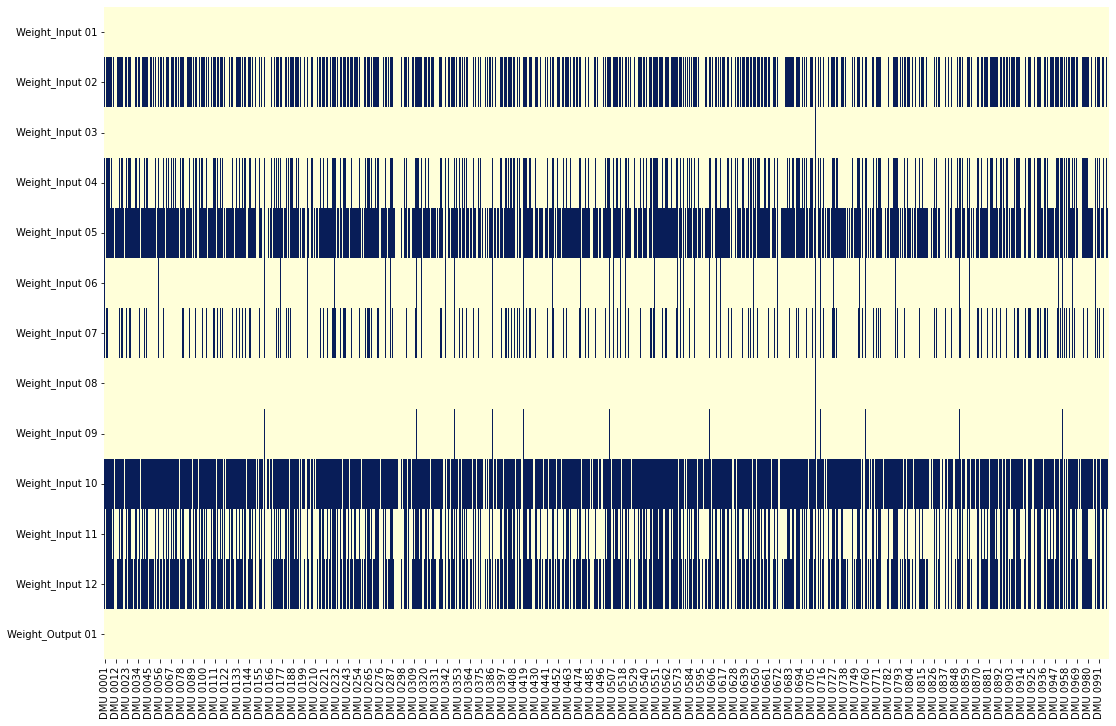

In [65]:
plt.figure(figsize=(18,12))
sns.heatmap(df_gb.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [66]:
res_gb = pd.DataFrame()
res_gb["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_gb["Efficiency_Scores_GB"] = df_gb["Efficiency_Scores"]
res_gb["Diff"] = res_gb["Efficiency_Scores_Basic"]  - res_gb["Efficiency_Scores_GB"]
res_gb["Diff_Perc"] = (res_gb["Diff"] / res_gb["Efficiency_Scores_Basic"]) * 100 
res_gb["Diff_Perc < 10"] = np.abs(res_gb["Diff_Perc"]) < 10  
res_gb = res_gb.round(4)
res_gb


,Efficiency_Scores_Basic,Efficiency_Scores_GB,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.5019,0.4524,0.0495,9.8645,True
DMU 0002,0.7917,0.6149,0.1768,22.3334,False
DMU 0003,0.5650,0.5319,0.0332,5.8695,True
DMU 0004,0.8610,0.7368,0.1242,14.4240,False
DMU 0005,0.7019,0.6556,0.0462,6.5858,True
...,...,...,...,...,...
DMU 0996,0.6703,0.6022,0.0681,10.1621,False
DMU 0997,0.7414,0.6251,0.1164,15.6972,False
DMU 0998,0.6228,0.5620,0.0608,9.7592,True
DMU 0999,0.7489,0.6789,0.0700,9.3426,True


In [67]:
mitosheet.sheet(res_gb, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-621a1afa-cbc1-4fd2-bf74-dd00d154bcf0", "code": {"imports…

In [68]:
blue = res_gb["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_gb["Diff_Perc < 10"]) - (res_gb["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  630
red :  370


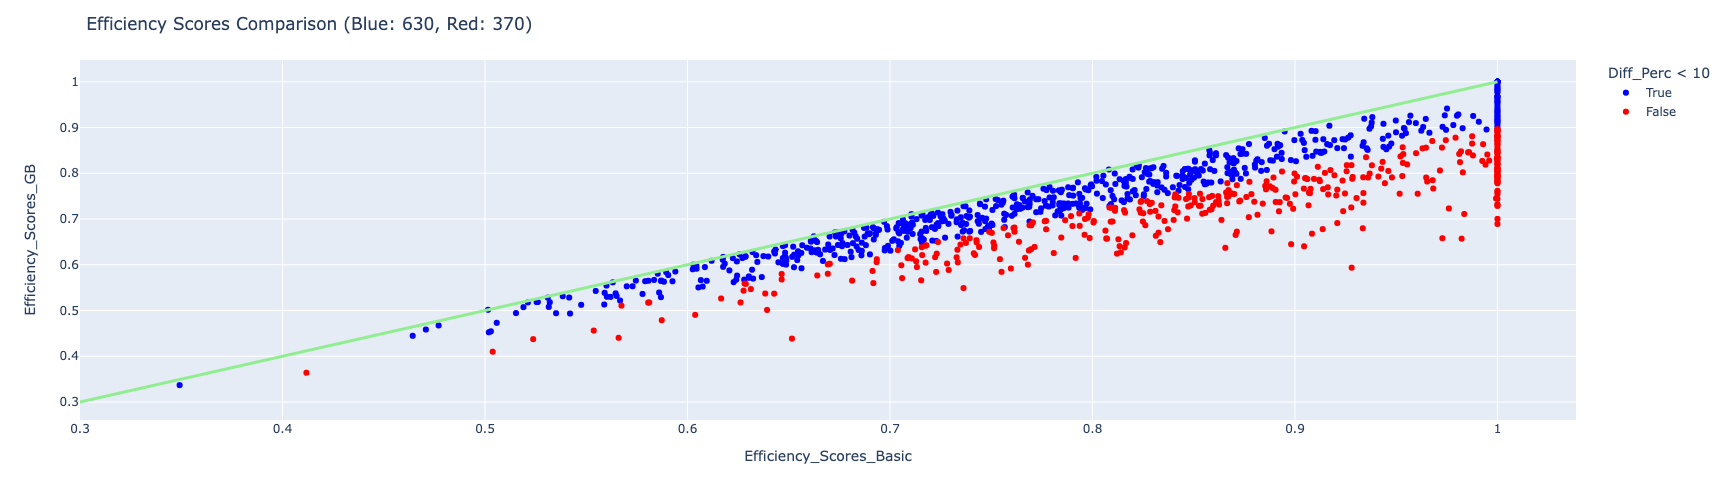

In [69]:
fig = px.scatter(res_gb, x="Efficiency_Scores_Basic", y="Efficiency_Scores_GB", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_GB", "Diff_Perc"] + [res_gb.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### XGBRegressor

In [70]:
df_xgb = pd.read_excel("US12I1O_xgbregressor_Solution.xlsx", index_col=0)
df_xgb

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.441074,0.001558,0.000000,0.000258,0.000000,0.000000,0.000258,0.000258,0.001558,0.001558,0.000258,0.000000,0.000000,0.001759
DMU 0002,0.597676,0.000837,0.000000,0.000481,0.000048,0.000000,0.000481,0.000481,0.000481,0.000481,0.000481,0.000481,0.000000,0.001604
DMU 0003,0.499669,0.001572,0.000000,0.000366,0.000087,0.000000,0.000366,0.000366,0.000366,0.000366,0.000366,0.000366,0.000000,0.001703
DMU 0004,0.740749,0.000783,0.000000,0.000508,0.000000,0.000000,0.000508,0.000508,0.000508,0.000783,0.000508,0.000268,0.000000,0.001601
DMU 0005,0.646292,0.000877,0.000000,0.000536,0.000000,0.000000,0.000536,0.000536,0.000536,0.000536,0.000536,0.000536,0.000000,0.001727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.615366,0.002798,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.002798,0.002798,0.000042,0.000042,0.000042,0.002204
DMU 0997,0.587487,0.000995,0.000000,0.000373,0.000373,0.000000,0.000373,0.000373,0.000651,0.000651,0.000373,0.000373,0.000000,0.001706
DMU 0998,0.543972,0.000886,0.000000,0.000509,0.000051,0.000000,0.000509,0.000509,0.000509,0.000509,0.000509,0.000509,0.000000,0.001697
DMU 0999,0.645709,0.000914,0.000144,0.000373,0.000144,0.000000,0.000373,0.000373,0.000914,0.000914,0.000373,0.000373,0.000000,0.001698


In [71]:
print((df_xgb==0).sum())
print("Total : ", (df_xgb==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      752
Weight_Input 03       51
Weight_Input 04      331
Weight_Input 05      900
Weight_Input 06       10
Weight_Input 07        9
Weight_Input 08        1
Weight_Input 09        1
Weight_Input 10        1
Weight_Input 11      169
Weight_Input 12      928
Weight_Output 01       0
dtype: int64
Total :  3153


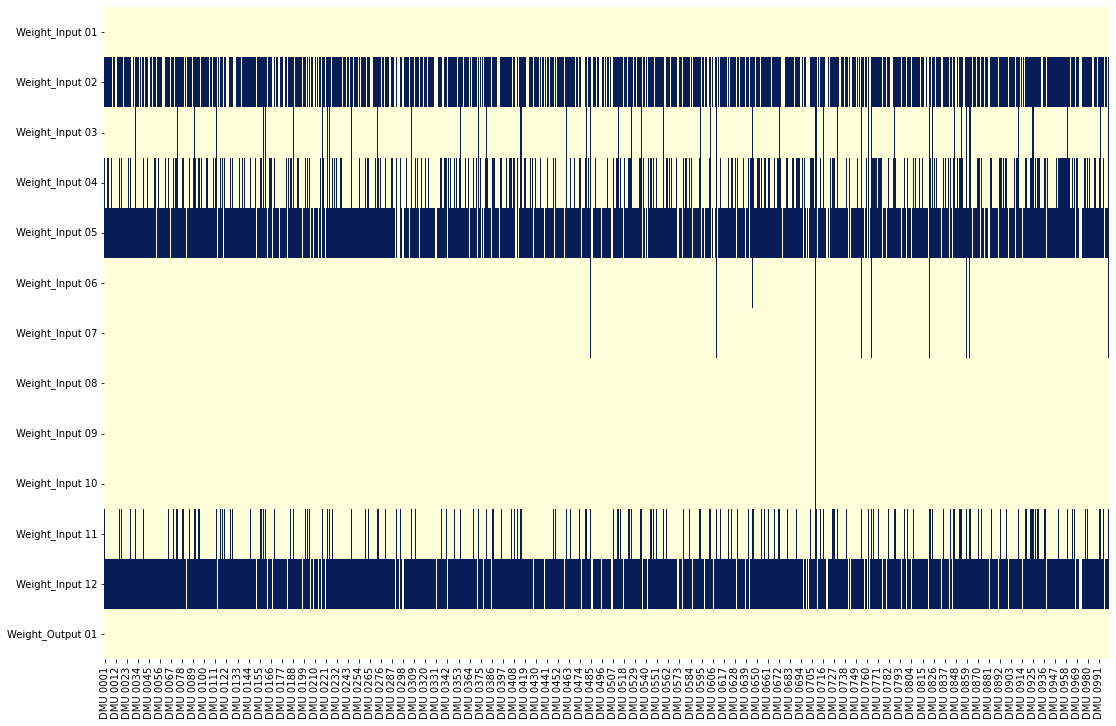

In [72]:
plt.figure(figsize=(18,12))
sns.heatmap(df_xgb.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [73]:
res_xgb = pd.DataFrame()
res_xgb["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_xgb["Efficiency_Scores_XGB"] = df_xgb["Efficiency_Scores"]
res_xgb["Diff"] = res_xgb["Efficiency_Scores_Basic"]  - res_xgb["Efficiency_Scores_XGB"]
res_xgb["Diff_Perc"] = (res_xgb["Diff"] / res_xgb["Efficiency_Scores_Basic"]) * 100 
res_xgb["Diff_Perc < 10"] = np.abs(res_xgb["Diff_Perc"]) < 10  
res_xgb = res_xgb.round(4)
res_xgb


,Efficiency_Scores_Basic,Efficiency_Scores_XGB,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.5019,0.4411,0.0608,12.1204,False
DMU 0002,0.7917,0.5977,0.1940,24.5077,False
DMU 0003,0.5650,0.4997,0.0654,11.5699,False
DMU 0004,0.8610,0.7407,0.1202,13.9654,False
DMU 0005,0.7019,0.6463,0.0556,7.9165,True
...,...,...,...,...,...
DMU 0996,0.6703,0.6154,0.0549,8.1956,True
DMU 0997,0.7414,0.5875,0.1540,20.7643,False
DMU 0998,0.6228,0.5440,0.0788,12.6537,False
DMU 0999,0.7489,0.6457,0.1032,13.7765,False


In [74]:
mitosheet.sheet(res_xgb, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-55de3394-09f3-4261-8329-bc41fdce9ee0", "code": {"imports…

In [75]:
blue = res_xgb["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_xgb["Diff_Perc < 10"]) - (res_xgb["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  543
red :  457


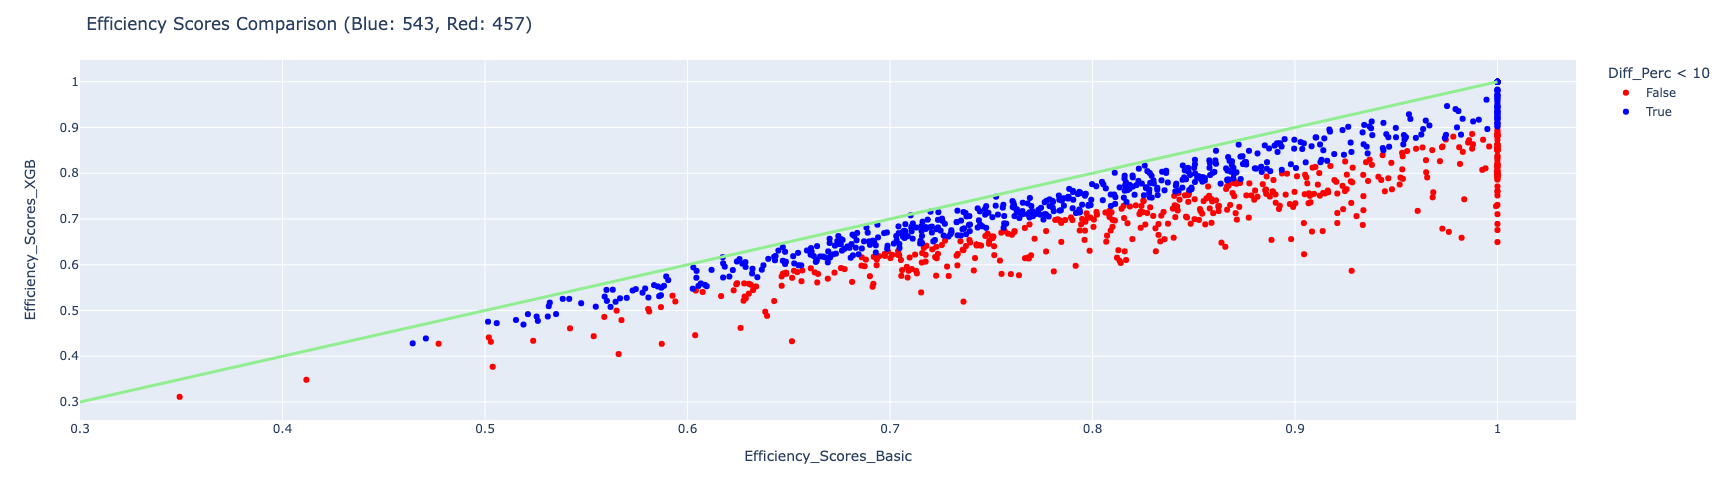

In [76]:
fig = px.scatter(res_xgb, x="Efficiency_Scores_Basic", y="Efficiency_Scores_XGB", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_XGB", "Diff_Perc"] + [res_xgb.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()